# Convolutions of tensors

Colored images usually have $C$ channels, e.g., $C = 3$ for an RGB image. In such case an image of height $H$ and width $W$ is stored as a tensor of shape $H\times W \times C$. To perform a convolution of tensors kernels must have the same number of channels. Each entry of the convolved image is equal to the sum of convolutions of individual channels:

$$
    \boldsymbol A * \boldsymbol B = \sum \limits_{k=1}^C A_{:, :, k} * B_{:, :, k}
$$

```{figure} https://www.researchgate.net/profile/Santhiya-Rajan/post/How-will-channels-RGB-effect-convolutional-neural-network/attachment/5c67b72d3843b0544e664e12/AS%3A726829115666434%401550300973344/download/cnn_1.gif
:align: center
```

Paddings, strides and dilations also work in multichannel case.

## Space example

Download and RGB-image:

(512, 512, 3)


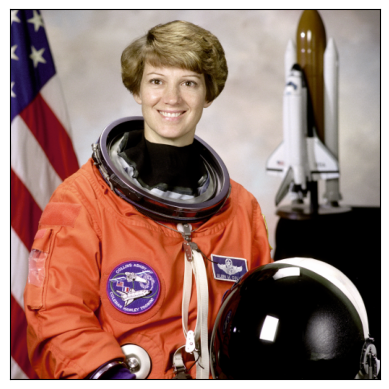

In [2]:
import matplotlib.pyplot as plt
from skimage import data

astro = data.astronaut()
print(astro.shape)
plt.imshow(astro)
plt.xticks([]);
plt.yticks([]);

Convolve with blurring filter of shape $n\times n \times 3$:

In [82]:
import numpy as np
from scipy.signal import convolve
n = 5
blur_kernel = np.ones((n, n, 3)) / n**2
blurred_astro = convolve(astro, blur_kernel, mode="valid")
blurred_astro.shape

(508, 508, 1)

The output has only one channel:

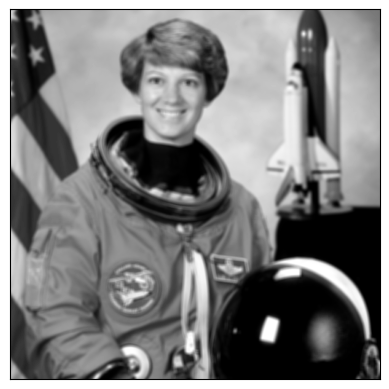

In [83]:
plt.imshow(blurred_astro, cmap="gray")
plt.xticks([]);
plt.yticks([]);

## Multiple output channels

In the described above procedure the convolved image has $1$ channel. To increase the number of output channels one needs to add one more dimensionality to the kernel $\boldsymbol B$: $\boldsymbol B \in \mathbb R^{h\times w\times C_{\mathrm{in}} \times  C_{\mathrm{out}}}$. Now after convolution of an image  $\boldsymbol A \in \mathbb R^{H\times W\times C_{\mathrm{in}}}$ with $\boldsymbol B$ we obtain a tensor with $C_{\mathrm{out}}$ channels:

$$ 
(\boldsymbol A * \boldsymbol B)_{:, :, j} = \sum\limits_{k=1}^{C_{\mathrm{in}}} A_{:, :, k} * B_{:, :, k, j}, \quad j = 1, \ldots, C_{\mathrm{out}}.
$$